In [1]:
import pandas as pd


In [2]:
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data_list =[]

df1 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/processed.cleveland.data", names = column_names)
df2 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/processed.hungarian.data", names = column_names)
df3 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/processed.switzerland.data", names = column_names)
df4 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/processed.va.data", names = column_names)
df5=pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/heart.csv")

df1_1= df1.append(df2)
df2_2= df3.append(df4)

df_final= df1_1.append(df2_2)
df_final=df_final.append(df5)

print(df_final.head())

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  63.0  1.0  1.0      145  233   1       2     150     0     2.3     3  0.0   
1  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
2  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
3  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
4  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   

  thal  num  
0  6.0    0  
1  3.0    2  
2  7.0    1  
3  3.0    0  
4  3.0    0  


In [3]:
print(df_final.info())
print(df_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1223 non-null   float64
 1   sex       1223 non-null   float64
 2   cp        1223 non-null   float64
 3   trestbps  1223 non-null   object 
 4   chol      1223 non-null   object 
 5   fbs       1223 non-null   object 
 6   restecg   1223 non-null   object 
 7   thalach   1223 non-null   object 
 8   exang     1223 non-null   object 
 9   oldpeak   1223 non-null   object 
 10  slope     1223 non-null   object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       1223 non-null   int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 143.3+ KB
None
(1223, 14)


In [4]:
print(df_final.describe())

               age          sex           cp          num
count  1223.000000  1223.000000  1223.000000  1223.000000
mean     53.722813     0.762878     2.684383     0.929681
std       9.344604     0.425492     1.373758     1.119662
min      28.000000     0.000000     0.000000     0.000000
25%      47.000000     1.000000     2.000000     0.000000
50%      54.000000     1.000000     3.000000     1.000000
75%      60.000000     1.000000     4.000000     2.000000
max      77.000000     1.000000     4.000000     4.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [6]:
#"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"
df_final=df_final.drop(['ca'],axis=1)
df_final=df_final.drop(['thal'],axis=1)
df_1=df_final[df_final.trestbps!= '?']
df_2=df_1[df_1.chol!='?']
df_2=df_2[df_2.fbs!='?']
df_2=df_2[df_2.restecg!='?']
df_2=df_2[df_2.thalach!='?']
df_2=df_2[df_2.exang!='?']
df_2=df_2[df_2.oldpeak!='?']
df_2=df_2[df_2.slope!='?']




In [7]:
data = df_2[df_2.num!=4]

print(data.describe())
data.num.value_counts()

              age         sex          cp         num
count  808.000000  808.000000  808.000000  808.000000
mean    54.602723    0.726485    2.457921    0.887376
std      8.878323    0.446039    1.495375    1.023123
min     29.000000    0.000000    0.000000    0.000000
25%     48.000000    0.000000    1.000000    0.000000
50%     55.000000    1.000000    3.000000    1.000000
75%     61.000000    1.000000    4.000000    1.000000
max     77.000000    1.000000    4.000000    3.000000


0    382
1    226
2    109
3     91
Name: num, dtype: int64

In [144]:
#data.to_csv('three.csv', encoding='utf-8')

In [149]:
d=pd.read_csv('three.csv',index_col=0)

In [150]:
d.num.value_counts()

0    382
1    226
2    200
Name: num, dtype: int64

In [151]:
X = d.drop(['num'], axis=1)
y = d['num']

In [170]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state=42)

In [171]:
#X.to_csv('X_train.csv', encoding='utf-8')

In [172]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [189]:
classifier = KNeighborsClassifier(n_neighbors =17)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)



In [190]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [191]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.60


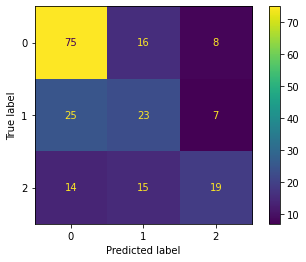

In [188]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show() 

In [177]:

knn_scores=[]
for k in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors =k)
    score=cross_val_score(classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [178]:
knn_scores


[0.562962962962963,
 0.5382561728395061,
 0.5208641975308642,
 0.528395061728395,
 0.5320679012345678,
 0.5320833333333334,
 0.5320524691358025,
 0.5272222222222223,
 0.5185185185185185,
 0.5123765432098766,
 0.5135802469135802,
 0.512361111111111,
 0.5061419753086419,
 0.5135648148148149,
 0.5023919753086419,
 0.5061265432098766,
 0.5073919753086419,
 0.5147839506172839,
 0.5147839506172841,
 0.5011728395061728]

In [179]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [180]:
cm

array([[79, 16,  4],
       [23, 25,  7],
       [15, 16, 17]], dtype=int64)

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=21)
rf = rf.fit(X_train,y_train)
score=cross_val_score(rf,X,y,cv=10)
score.mean()

0.5455709876543209

In [164]:
rf_scores=[]
for k in range(1,20):
    rf=RandomForestClassifier(n_estimators=k)
    score=cross_val_score(rf,X,y,cv=10)
    rf_scores.append(score.mean())

In [165]:
rf_scores

[0.44419753086419755,
 0.5282716049382715,
 0.5147993827160493,
 0.5406635802469136,
 0.5419753086419753,
 0.53070987654321,
 0.5530555555555556,
 0.570324074074074,
 0.5555092592592592,
 0.5530246913580247,
 0.5554629629629629,
 0.576574074074074,
 0.5702623456790124,
 0.5492592592592592,
 0.5517901234567902,
 0.5714969135802469,
 0.5629012345679013,
 0.565324074074074,
 0.5628858024691359]

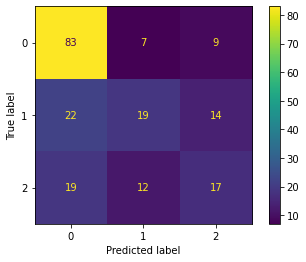

In [182]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

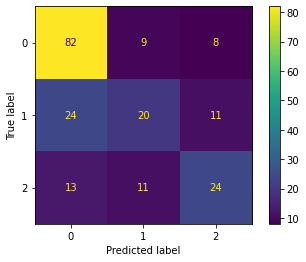

In [183]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [87]:
import pickle


In [88]:
with open("model1_predictis",'wb')as f:
    pickle.dump(classifier,f)